In [2]:
# MNIST 예제를 구현해보자!
# Data는 Kaggle에서 다운로드 한다!

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
df = pd.read_csv('../data/mnist/train.csv')
display(df.shape)   # (42000, 785)

(42000, 785)

In [3]:
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 데이터 전처리
# 결측치나 이상치가 존재하지 않는다.
# 단, 정규화는 필요하다!

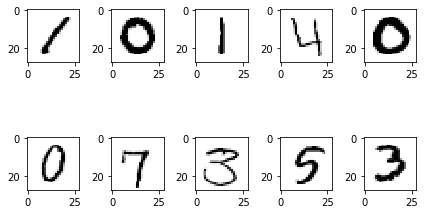

In [7]:
# 이미지 확인
figure = plt.figure()   # 도화지 준비
ax_arr = []   # python list

img_data = df.drop('label', axis=1, inplace=False).values   # 2차원 ndarray로 빼낸다.

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28),
                     cmap='Greys',              # 흑백이미지 표현
                     interpolation='nearest')   # 보간법

plt.tight_layout()   # subplot간의 간격을 준다.
plt.show()

In [8]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [12]:
## Tensorflow Implementation ##
sess = tf.Session()

onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]))
b = tf.Variable(tf.random.normal([10]))

# Hypothesis, Model
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# session, 초기화
sess.run(tf.global_variables_initializer())

# 반복학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    
    total_batch = int(norm_train_x_data.shape[0] / batch_size)
    
    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        
        _, loss_val = sess.run([train, loss], feed_dict={X:batch_x,
                                                         T:batch_y})
        
    if step % 100 == 0:
        print('loss val : {}'.format(loss_val))

loss val : 1.2059354782104492
loss val : 0.24192436039447784
loss val : 0.22665485739707947
loss val : 0.21622036397457123
loss val : 0.20953845977783203
loss val : 0.2049787938594818
loss val : 0.20144236087799072
loss val : 0.19850170612335205
loss val : 0.19604459404945374
loss val : 0.1940048336982727


In [13]:
# accuracy 측정

predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:norm_test_x_data,
                                             T:onehot_test_t_data})
print('Accuracy : {}'.format(accuracy_val))   # 0.908650815486908

Accuracy : 0.908650815486908


In [4]:
import tensorflow as tf

print(tf.__version__)   # 2.3.0

W = tf.random.normal([1], dtype=tf.float32)

# 1.15 버전에서 W의 값을 알아내려면 session을 통해서 node를 실행시켜서
# 값을 얻어야 한다.
# 2.x 버전은 eager excution(즉시실행모드)을 지원한다.
# session이 필요가 없고 일반적인 프로그래밍 하는 것처럼 사용할 수 있다.
print(W.numpy())

# 추가적으로 초기화 하는 코드 역시 불필요해서 이제는 사용하지 않는다.
# sess.run(tf.global_variables_initializer())   # 사용하지 않는다.

# placeholder도 역시 삭제되었다!

2.3.0
[1.6759058]


In [ ]:
# 그러면 Keras를 사용한다고 하는데..
# 코드는 어떻게 작성하는 건가요?

# 그림과 매칭해서 봐야한다!

# keras의 model은 어떻게 만드나요?
import tensorflow as tf

model = tf.keras.models.Sequential()   # keras의 Sequential model을 만든다.

# model.add()를 이용해서 layer를 추가해주자! 밑은 의미상의 코드
# model.add('input layer')
# model.add('output layer')

# loss의 종류와 optimizer 종류를 설정
# model.compile()

# 학습 (마치 sklearn 사용하는 것처럼..)
# model.fit()

# 평가와 predict
# model.evaluate()  => 모델 평가
# model.predict()   => 예측값 도출

# 모델 저장
# model.save()

In [13]:
%reset
# 대표적인 multinomial 예제인 MNIST를 이용해서
# Tensorflow 2.x 버전으로 구현해보자!

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential   # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(input Layer)
                                                     # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading

df = pd. read_csv('../data/mnist/train.csv')
display(df.head())

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [15]:
# Tensorflow 2.x 구현

# model 생성
model = Sequential()   # model 박스 하나 만듬

# print(norm_train_x_data.shape)   # (29400, 784)

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))
# input layer는 사실 하는일이 없다! 그래서 코드를 나누지 않고 한번에
# 기술할 수도 있다! (이건 나중에 진행)

print(model.summary())
# dense_2 (Dense)              (None, 10)                7850 => bias까지 포함

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# model compile
# 사용할 loss 함수를 지정, 사용한 optimizer(알고리즘)를 지정
from tensorflow.keras.optimizers import SGD

# loss
# linear regression : linear
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy (onehot encoding 처리를 해야한다.)
# multinomial classification : sparse_categorical_crossentropy (onehot 처리가 필요 없다.)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
236/236 [==============================] - 5s 21ms/step - loss: 2.2438 - accuracy: 0.1567 - val_loss: 2.1256 - val_accuracy: 0.2393
Epoch 2/100
236/236 [==============================] - 3s 13ms/step - loss: 2.0156 - accuracy: 0.3484 - val_loss: 1.9243 - val_accuracy: 0.4344
Epoch 3/100
236/236 [==============================] - 4s 16ms/step - loss: 1.8323 - accuracy: 0.5137 - val_loss: 1.7566 - val_accuracy: 0.5707: 1.8334 - accuracy: 0.51
Epoch 4/100
236/236 [==============================] - 3s 11ms/step - loss: 1.6792 - accuracy: 0.6193 - val_loss: 1.6160 - val_accuracy: 0.6534
Epoch 5/100
236/236 [==============================] - 3s 14ms/step - loss: 1.5506 - accuracy: 0.6819 - val_loss: 1.4976 - val_accuracy: 0.7029- ETA: 0s - loss: 1.5678 - accura - ETA: 0s - loss: 1.5634 -  - ETA: 0s - loss: 1.5532 - accuracy: 
Epoch 6/100
236/236 [==============================] - 3s 11ms/step - loss: 1.4423 - accuracy: 0.7194 - val_loss: 1.3977 - val_accuracy: 0.7332
Epoch 7/100


236/236 [==============================] - 1s 5ms/step - loss: 0.5511 - accuracy: 0.8691 - val_loss: 0.5524 - val_accuracy: 0.8675
Epoch 57/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5478 - accuracy: 0.8690 - val_loss: 0.5493 - val_accuracy: 0.8679
Epoch 58/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5446 - accuracy: 0.8693 - val_loss: 0.5462 - val_accuracy: 0.8684
Epoch 59/100
236/236 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.8700 - val_loss: 0.5432 - val_accuracy: 0.8682
Epoch 60/100
236/236 [==============================] - 1s 4ms/step - loss: 0.5385 - accuracy: 0.8703 - val_loss: 0.5403 - val_accuracy: 0.8684
Epoch 61/100
236/236 [==============================] - 1s 4ms/step - loss: 0.5356 - accuracy: 0.8708 - val_loss: 0.5374 - val_accuracy: 0.8694
Epoch 62/100
236/236 [==============================] - 1s 5ms/step - loss: 0.5327 - accuracy: 0.8711 - val_loss: 0.5347 - val_accuracy: 0.8697
Epoch

In [17]:
print(model.evaluate(norm_test_x_data, test_t_data))
#         loss                accuracy
# [0.47846972942352295, 0.8764285445213318]

394/394 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.8764
[0.47846972942352295, 0.8764285445213318]


In [ ]:
# 이렇게 만든 모델을 저장해보자!
# 학습한 후 모델이 메모리에 저장되어 있다. 프로그램 종료하면 다 날라간다!
# 내일 다시 하려면 처음부터 다시 학습해야한다! => 시간이 오래 걸린다.

# 모델 학습에 시간이 너무 오래 걸리는 경우
# 중간에 미리 저장해놓으면 거기서부터 재 학습이 가능!

# 다른 사람과 모델 공유가 가능!

# 저장을 할 때 2가지 방법이 있다.
# 모델을 저장할 때 모델 구조와 계산된 W,b를 같이 저장할 수 있다.
# 장점 => 편하다!  단점 => 사이즈 크다!

# 모델을 저장할 때 모델 구조는 저장하지 않고 W,b만 저장
# 장점 => 크기가 작다. 단점 => 사용하려면 모델을 먼저 만들고 W,b를 로딩.

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential   # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(input Layer)
                                                     # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd. read_csv('../data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 사용했다.
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할 것이다.
# 최종 모델 성능 평가를 위해서 딱 1번만 사용할 것이다.
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss 함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding 처리가 필요 없다!

# model 생성
model = Sequential()   # model 박스 하나 만듬

# print(norm_train_x_data.shape)   # (29400, 784)

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

# model compile
model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model을 저장하려고 한다. model 구조 빼고 checkpoint기능을 이용해서
# weight, b만 저장
# 어디에 저장할지를 알려줘야 한다.
checkpoint_path = '../training_ckpt/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)  # 실제 경로로 만든다!
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,   # Weight만 저장하겠다.
                             verbose=1)


# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,             # 0으로 하면 결과가 안나온다.
                    validation_split=0.2,
                    callbacks=[cp_callback])

# 우리 모델에 대한 최종평가 진행
print(model.evaluate(norm_test_x_data, test_t_data))
#         loss                accuracy
# [0.47846972942352295, 0.8764285445213318]

Epoch 1/100
225/236 [===========================>..] - ETA: 0s - loss: 2.1500 - accuracy: 0.2305
Epoch 00001: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 3s 13ms/step - loss: 2.1451 - accuracy: 0.2356 - val_loss: 2.0373 - val_accuracy: 0.3432
Epoch 2/100
235/236 [============================>.] - ETA: 0s - loss: 1.9433 - accuracy: 0.4259
Epoch 00002: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 3s 12ms/step - loss: 1.9431 - accuracy: 0.4262 - val_loss: 1.8528 - val_accuracy: 0.4968
Epoch 3/100
233/236 [============================>.] - ETA: 0s - loss: 1.7753 - accuracy: 0.5489
Epoch 00003: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 3s 12ms/step - loss: 1.7739 - accuracy: 0.5500 - val_loss: 1.6978 - val_accuracy: 0.5964
Epoch 4/100
232/236 [============================>.] - ETA: 0s - loss: 1.6320 - accuracy: 0.6327
Epoch 00004: saving model to ../training_ckpt\cp.ckpt


Epoch 29/100
232/236 [============================>.] - ETA: 0s - loss: 0.7068 - accuracy: 0.8408
Epoch 00029: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.8406 - val_loss: 0.7025 - val_accuracy: 0.8422
Epoch 30/100
222/236 [===========================>..] - ETA: 0s - loss: 0.6980 - accuracy: 0.8423
Epoch 00030: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.8423 - val_loss: 0.6932 - val_accuracy: 0.8439
Epoch 31/100
231/236 [============================>.] - ETA: 0s - loss: 0.6891 - accuracy: 0.8434
Epoch 00031: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.8443 - val_loss: 0.6844 - val_accuracy: 0.8446
Epoch 32/100
214/236 [==========================>...] - ETA: 0s - loss: 0.6790 - accuracy: 0.8460
Epoch 00032: saving model to ../training_ckpt\cp.ckpt

Epoch 58/100
230/236 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.8677
Epoch 00058: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 4ms/step - loss: 0.5461 - accuracy: 0.8676 - val_loss: 0.5478 - val_accuracy: 0.8684
Epoch 59/100
213/236 [==========================>...] - ETA: 0s - loss: 0.5449 - accuracy: 0.8671
Epoch 00059: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.8680 - val_loss: 0.5449 - val_accuracy: 0.8680
Epoch 60/100
235/236 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.8686
Epoch 00060: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.5400 - accuracy: 0.8686 - val_loss: 0.5419 - val_accuracy: 0.8680
Epoch 61/100
222/236 [===========================>..] - ETA: 0s - loss: 0.5364 - accuracy: 0.8698
Epoch 00061: saving model to ../training_ckpt\cp.ckpt

Epoch 87/100
236/236 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.8788
Epoch 00087: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.8788 - val_loss: 0.4853 - val_accuracy: 0.8782
Epoch 88/100
232/236 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.8790
Epoch 00088: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.8793 - val_loss: 0.4838 - val_accuracy: 0.8789
Epoch 89/100
219/236 [==========================>...] - ETA: 0s - loss: 0.4779 - accuracy: 0.8796
Epoch 00089: saving model to ../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.8795 - val_loss: 0.4823 - val_accuracy: 0.8787
Epoch 90/100
210/236 [=========================>....] - ETA: 0s - loss: 0.4786 - accuracy: 0.8788
Epoch 00090: saving model to ../training_ckpt\cp.ckpt

In [21]:
%reset
# 아하... 이렇게 저장할 수 있다!
# 불러서 다시 사용하려면 어떻게 해야 할까?

# 확인하기 위해...
# 일단 학습하지 않은 상태로 evaluation을 진행하면 당연히 평가 결과가
# 좋지 않을 것이다. 이것을 먼저 확인하고
# 그 다음에 checkpoint 파일을 로드해서 model을 재설정하고 평가를 진행한다.
# 좋게 나올 것이다!

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential   # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(input Layer)
                                                     # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd. read_csv('../data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 사용했다.
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할 것이다.
# 최종 모델 성능 평가를 위해서 딱 1번만 사용할 것이다.
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss 함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding 처리가 필요 없다!

# model 생성
model = Sequential()   # model 박스 하나 만듬

# print(norm_train_x_data.shape)   # (29400, 784)

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

# model compile
model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 원래는 학습을 진행해야한다! 그런데 학습을 진행하지 않을 것이다!

# 학습을 진행하지 않고 최종평가 진행
print(model.evaluate(norm_test_x_data, test_t_data))
#         loss                accuracy
# [2.414344072341919, 0.10619047284126282]
# 당연히 학습이 안된 모델이기 때문에 이렇게 나오는 게 정상이다.

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
394/394 [==============================] - 3s 7ms/step - loss: 2.4126 - accuracy: 0.0720
[2.4125711917877197, 0.07198412716388702]


In [22]:
# 이번에는 checkpoint 파일에 있는 weight를 load한 후
# evaluation 시켜보자!

checkpoint_path = '../training_ckpt/cp.ckpt'
model.load_weights(checkpoint_path)
print(model.evaluate(norm_test_x_data, test_t_data))
#         loss                accuracy
# [0.4783697724342346, 0.8758730292320251]

394/394 [==============================] - 3s 8ms/step - loss: 0.4784 - accuracy: 0.8759
[0.4783697724342346, 0.8758730292320251]
